## Imports

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

## Loading, preprocessing and exploring Fashion MNIST data

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [61]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

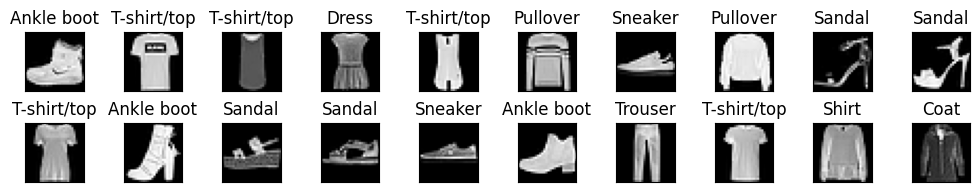

In [60]:
plt.figure(figsize=(10,2))
for idx in range(20):
    plt.subplot(2, 10, idx + 1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.yticks([])
    plt.xticks([])
    plt.title(class_names[train_labels[idx]])
plt.tight_layout(h_pad=1)
plt.show()

## Model - definition, training and prediction

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 3.2725 - accuracy: 0.7049
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6962 - accuracy: 0.7506
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5967 - accuracy: 0.7799
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5400 - accuracy: 0.8060
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5244 - accuracy: 0.8162
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5036 - accuracy: 0.8254
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4902 - accuracy: 0.8317
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4826 - accuracy: 0.8334
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4819 - accuracy: 0.8362
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.473

In [75]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.5714 - accuracy: 0.8213


In [76]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [77]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [83]:
predicted_idxs = np.argmax(predictions, axis=1)

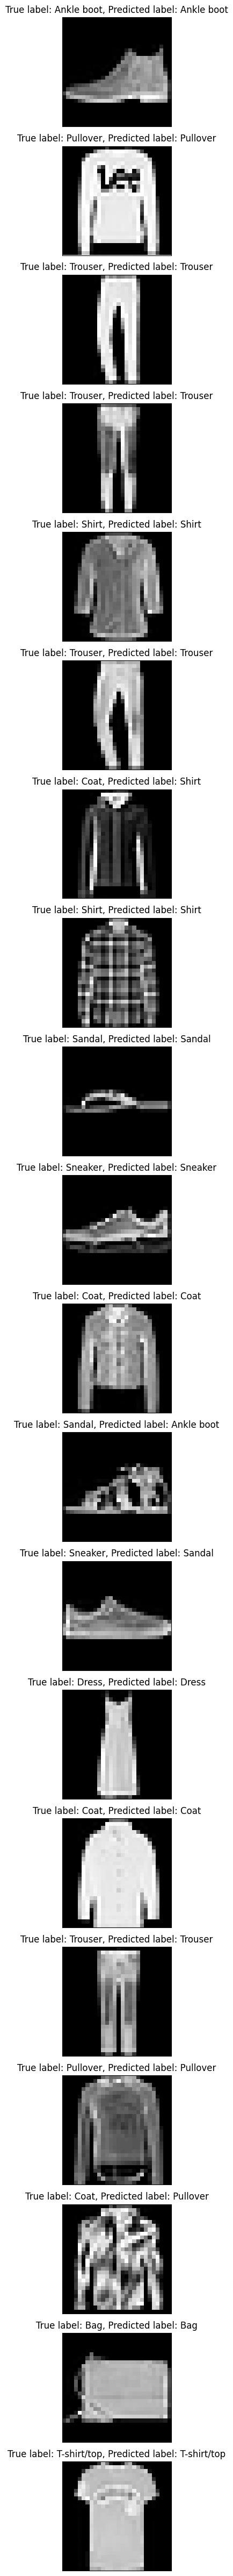

In [99]:
plt.figure(figsize=(12,48))
for idx in range(20):
    plt.subplot(20, 1, idx + 1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.yticks([])
    plt.xticks([])
    plt.title(f'True label: {class_names[test_labels[idx]]}, Predicted label: {class_names[predicted_idxs[idx]]}')
plt.tight_layout(h_pad=1)
plt.show()